# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../Data/Bank Customer Segmentation.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Exploration

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        min_val = df[col].min()
        df[col].fillna(min_val, inplace=True)

In [9]:
df_cleaned = df.dropna(axis = 1, how = 'all')

In [10]:
df_cleaned.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
ONEOFF_PURCHASE_RATIO               0
INSTALLMENT_PURCHASE_RATIO          0
ADVANCE_RATIO                       0
PAYMENT_GAP                         0
PAYMENT_RATIO                       0
PURCHASES_PER_TRX                   0
ADVANCE_PER_TRX                     0
ONEOFF_PURCHASE_FREQ_RATIO          0
INSTALLMENT_

In [11]:
df_cleaned = df_cleaned.drop(columns=['CUST_ID'])

In [12]:
df_cleaned.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_PURCHASE_RATIO,INSTALLMENT_PURCHASE_RATIO,ADVANCE_RATIO,PAYMENT_GAP,PAYMENT_RATIO,PURCHASES_PER_TRX,ADVANCE_PER_TRX,ONEOFF_PURCHASE_FREQ_RATIO,INSTALLMENT_PURCHASE_FREQ_RATIO,ADVANCE_FREQ_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.0,1.0,0.000000,62.292297,1.436214,47.700000,0.000000,0.0,0.499997,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,0.0,1.000000,3030.692380,3.822677,0.000000,1610.736371,0.0,0.000000,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,0.0,0.000000,-5.218045,0.990103,64.430833,0.000000,1.0,0.000000,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,0.0,0.120712,-0.019163,0.000000,1499.000000,205.788017,1.0,0.000000,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,0.0,0.000000,433.543526,2.759800,16.000000,0.000000,1.0,0.000000,0.0


In [13]:
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

In [14]:
df_cleaned.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_PURCHASE_RATIO,INSTALLMENT_PURCHASE_RATIO,ADVANCE_RATIO,PAYMENT_GAP,PAYMENT_RATIO,PURCHASES_PER_TRX,ADVANCE_PER_TRX,ONEOFF_PURCHASE_FREQ_RATIO,INSTALLMENT_PURCHASE_FREQ_RATIO,ADVANCE_FREQ_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.0,1.0,0.000000,62.292297,1.436214,47.700000,0.000000,0.0,0.499997,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.0,0.0,1.000000,3030.692380,3.822677,0.000000,1610.736371,0.0,0.000000,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,0.0,0.000000,-5.218045,0.990103,64.430833,0.000000,1.0,0.000000,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1.0,0.0,0.120712,-0.019163,0.000000,1499.000000,205.788017,1.0,0.000000,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1.0,0.0,0.000000,433.543526,2.759800,16.000000,0.000000,1.0,0.000000,0.0


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [16]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

In [17]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores[n_clusters] = silhouette_score(scaled_data, cluster_labels)
    inertia_values[n_clusters] = kmeans.inertia_
    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_scores[n_clusters]:.4f}, Inertia: {inertia_values[n_clusters]:.4f}")

Clusters: 2, Silhouette Score: 0.2048, Inertia: 203559.1918
Clusters: 3, Silhouette Score: 0.2086, Inertia: 181256.0678
Clusters: 4, Silhouette Score: 0.2346, Inertia: 162066.4479
Clusters: 5, Silhouette Score: 0.2517, Inertia: 150229.6789
Clusters: 6, Silhouette Score: 0.2526, Inertia: 143878.5523
Clusters: 7, Silhouette Score: 0.2502, Inertia: 134500.4387
Clusters: 8, Silhouette Score: 0.2005, Inertia: 133322.4577
Clusters: 9, Silhouette Score: 0.2013, Inertia: 126971.3909
Clusters: 10, Silhouette Score: 0.2096, Inertia: 121311.2678
Clusters: 11, Silhouette Score: 0.2150, Inertia: 114504.0866
Clusters: 12, Silhouette Score: 0.2111, Inertia: 111078.0359
Clusters: 13, Silhouette Score: 0.2051, Inertia: 107433.8351
Clusters: 14, Silhouette Score: 0.2098, Inertia: 103213.8581
Clusters: 15, Silhouette Score: 0.2089, Inertia: 99346.1908
Clusters: 16, Silhouette Score: 0.2080, Inertia: 95976.7849
Clusters: 17, Silhouette Score: 0.2006, Inertia: 93485.7738
Clusters: 18, Silhouette Score: 0.2

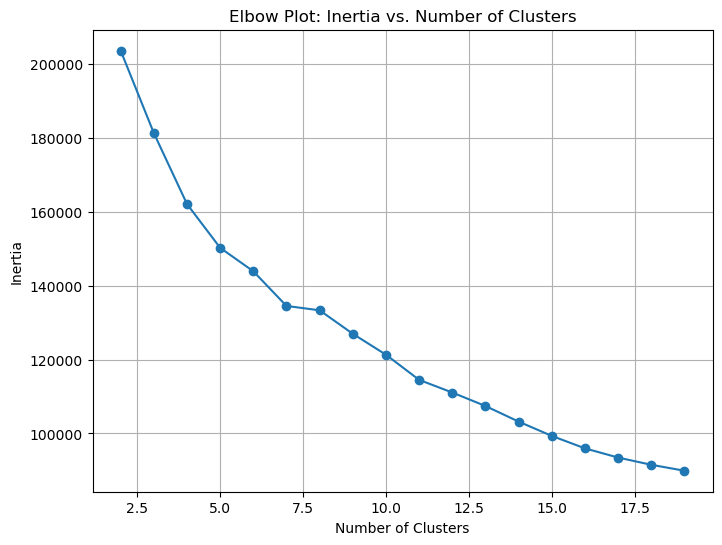

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title("Elbow Plot: Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [19]:
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_clusters}")


Optimal number of clusters (based on silhouette score): 6


In [20]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = kmeans_optimal.fit_predict(scaled_data)
df_cleaned['Cluster'] = final_labels

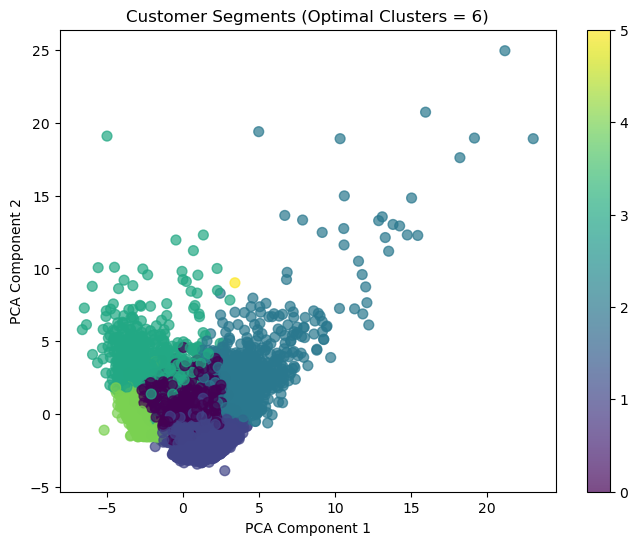

In [21]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Customer Segments (Optimal Clusters = {optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

In [18]:
print("\nCluster Centers (scaled features):")
print(kmeans_optimal.cluster_centers_)

# Analyze the segments by computing the mean values for each cluster
print("\nCluster-wise feature means:")
print(df_cleaned.groupby('Cluster').mean())


Cluster Centers (scaled features):
[[-6.52323405e-02  4.04072368e-01  2.01354708e-01  4.07643814e-01
  -2.72275584e-01 -3.45003523e-01  6.98746444e-01  1.66510332e+00
  -3.77328426e-01 -4.27370216e-01 -3.46824274e-01  1.90222528e-01
  -9.71085847e-02 -3.10094367e-01  2.57079734e-01]
 [-5.92619913e-02  3.97302711e-01 -3.69373135e-01 -2.53230004e-01
  -4.08153098e-01 -1.94827778e-01 -9.07786309e-01 -4.40695843e-01
  -7.81816288e-01 -7.72633187e-02 -1.65311454e-01 -5.02193966e-01
  -2.87614667e-01 -4.58539350e-01  2.78033778e-01]
 [ 1.50802670e+00  4.52023464e-01  1.46904985e-01  6.82308166e-02
   2.21517361e-01  1.15983150e+00  8.15060733e-01  4.16661999e-01
   6.97832154e-01  1.65035249e+00  1.44700356e+00  3.72368357e-01
   4.36165558e-01 -4.24428343e-01  1.48102310e-01]
 [-7.08607585e-01  2.67105656e-02 -4.76654898e-02 -2.93208220e-01
   4.25386060e-01 -4.63399695e-01  8.53008494e-01 -5.04809323e-01
   1.05027718e+00 -6.61871940e-01 -4.70379102e-01  5.97170424e-02
  -2.48404052e-01  